# EXPLORATORY DATA ANALYSIS
 Exploratory Data Analysis (EDA) on your dataset with the two folders gtFine (ground truth annotations) and leftImg8bit (images)

Number of images: 174
Number of labels: 522


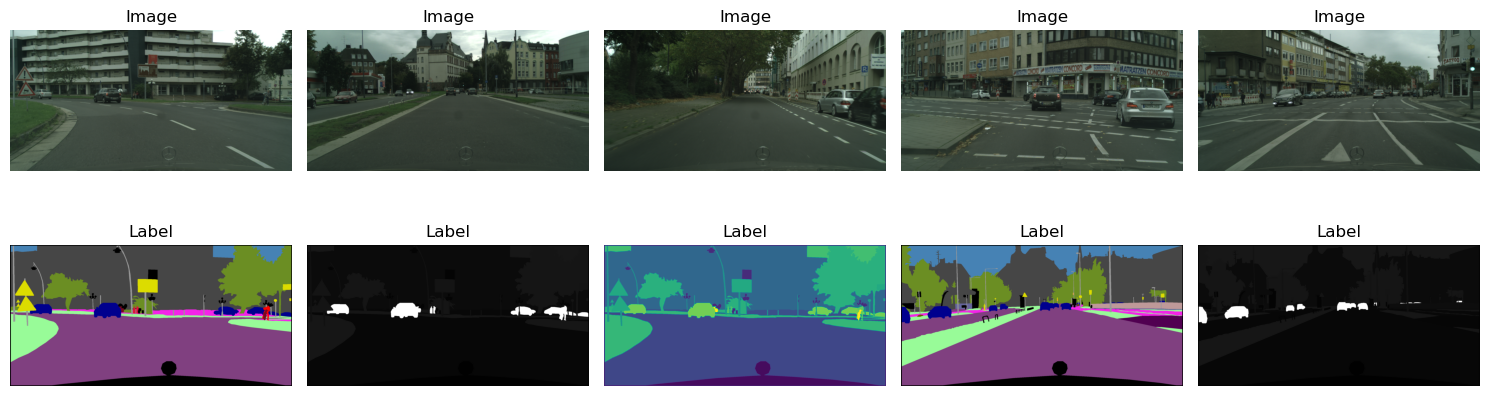

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set paths to your dataset
image_dir = r"D:\SpringBoard\leftImg8bit\train\aachen"  # Example for image path
label_dir = r"D:\SpringBoard\gtFine\train\aachen"  # Example for label path

# Load image files
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
label_files = [f for f in os.listdir(label_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Display basic statistics
print(f"Number of images: {len(image_files)}")
print(f"Number of labels: {len(label_files)}")

# Display some example images
num_examples = 5
plt.figure(figsize=(15, 5))

for i in range(min(num_examples, len(image_files))):
    img_path = os.path.join(image_dir, image_files[i])
    label_path = os.path.join(label_dir, label_files[i])
    
    # Load images
    img = Image.open(img_path)
    label = Image.open(label_path)

    # Display the image and its corresponding label
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Image')

    plt.subplot(2, num_examples, i + 1 + num_examples)
    plt.imshow(label)
    plt.axis('off')
    plt.title('Label')

plt.tight_layout()
plt.show()


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter


In [3]:

# Set paths to your dataset
label_dir = r"D:\SpringBoard\gtFine\train\aachen"  # Example for label path

# Load label files
label_files = [f for f in os.listdir(label_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
print("Label files:", label_files)  # Debugging line


Label files: ['aachen_000000_000019_gtFine_color.png', 'aachen_000000_000019_gtFine_instanceIds.png', 'aachen_000000_000019_gtFine_labelIds.png', 'aachen_000001_000019_gtFine_color.png', 'aachen_000001_000019_gtFine_instanceIds.png', 'aachen_000001_000019_gtFine_labelIds.png', 'aachen_000002_000019_gtFine_color.png', 'aachen_000002_000019_gtFine_instanceIds.png', 'aachen_000002_000019_gtFine_labelIds.png', 'aachen_000003_000019_gtFine_color.png', 'aachen_000003_000019_gtFine_instanceIds.png', 'aachen_000003_000019_gtFine_labelIds.png', 'aachen_000004_000019_gtFine_color.png', 'aachen_000004_000019_gtFine_instanceIds.png', 'aachen_000004_000019_gtFine_labelIds.png', 'aachen_000005_000019_gtFine_color.png', 'aachen_000005_000019_gtFine_instanceIds.png', 'aachen_000005_000019_gtFine_labelIds.png', 'aachen_000006_000019_gtFine_color.png', 'aachen_000006_000019_gtFine_instanceIds.png', 'aachen_000006_000019_gtFine_labelIds.png', 'aachen_000007_000019_gtFine_color.png', 'aachen_000007_000019

In [4]:

# Initialize lists to store dimensions and class counts
image_shapes = []
class_counts = []

# Define the number of classes (Cityscapes has 34 classes, for example)
num_classes = 34

# Class mapping (you can define this based on your dataset)
class_mapping = {i: f'Class {i}' for i in range(num_classes)}

# Analyze each label image
for label_file in label_files:
    label_path = os.path.join(label_dir, label_file)
    
    # Load label image
    label_img = Image.open(label_path)
    label_arr = np.array(label_img)
    
    print(f"Loaded {label_file} with shape {label_arr.shape}")  # Debugging line
    
    # Check dimensions
    image_shapes.append(label_arr.shape)
    
    # Count unique classes in the label
    unique_classes, counts = np.unique(label_arr, return_counts=True)
    class_counts.append(dict(zip(unique_classes, counts)))
    

    


Loaded aachen_000000_000019_gtFine_color.png with shape (1024, 2048, 4)
Loaded aachen_000000_000019_gtFine_instanceIds.png with shape (1024, 2048)
Loaded aachen_000000_000019_gtFine_labelIds.png with shape (1024, 2048)
Loaded aachen_000001_000019_gtFine_color.png with shape (1024, 2048, 4)
Loaded aachen_000001_000019_gtFine_instanceIds.png with shape (1024, 2048)
Loaded aachen_000001_000019_gtFine_labelIds.png with shape (1024, 2048)
Loaded aachen_000002_000019_gtFine_color.png with shape (1024, 2048, 4)
Loaded aachen_000002_000019_gtFine_instanceIds.png with shape (1024, 2048)
Loaded aachen_000002_000019_gtFine_labelIds.png with shape (1024, 2048)
Loaded aachen_000003_000019_gtFine_color.png with shape (1024, 2048, 4)
Loaded aachen_000003_000019_gtFine_instanceIds.png with shape (1024, 2048)
Loaded aachen_000003_000019_gtFine_labelIds.png with shape (1024, 2048)
Loaded aachen_000004_000019_gtFine_color.png with shape (1024, 2048, 4)
Loaded aachen_000004_000019_gtFine_instanceIds.png w

In [5]:

# Convert class counts to a single dictionary for all images
total_class_counts = Counter()
for count_dict in class_counts:
    total_class_counts.update(count_dict)



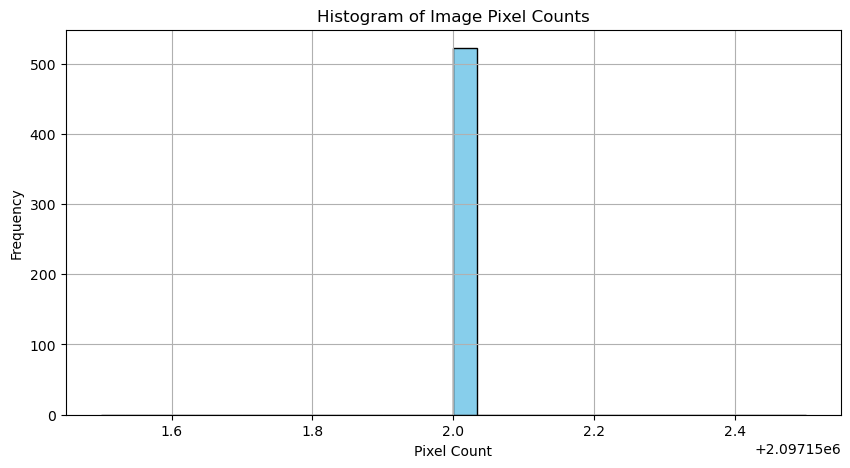

In [6]:

# Plot image dimensions
plt.figure(figsize=(10, 5))
plt.hist([shape[0] * shape[1] for shape in image_shapes], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Image Pixel Counts')
plt.xlabel('Pixel Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


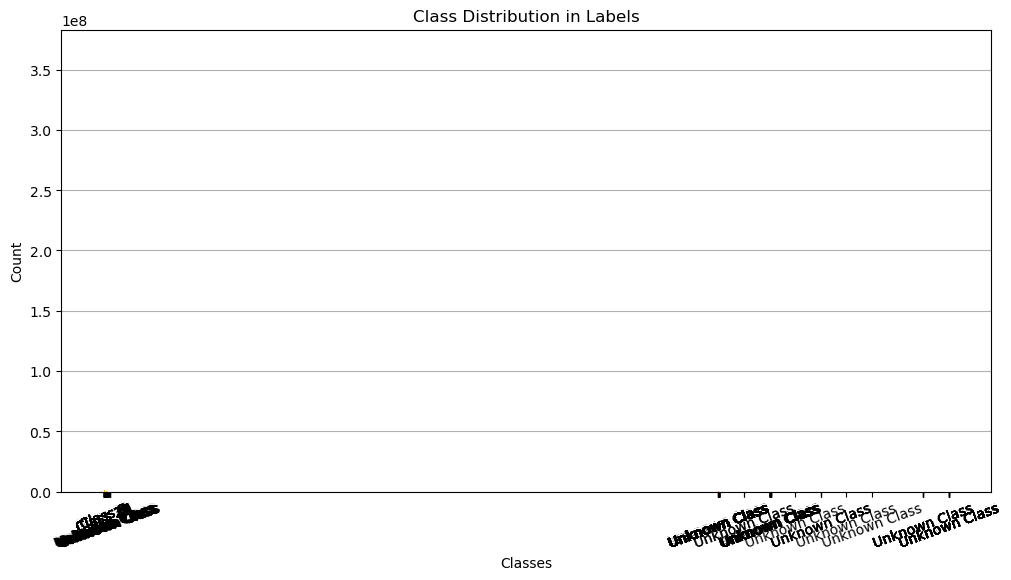

In [7]:

# Visualize class distribution
plt.figure(figsize=(12, 6))
classes, counts = zip(*total_class_counts.items())
plt.bar(classes, counts, color='orange')
plt.title('Class Distribution in Labels')
tick_labels = [class_mapping.get(i, 'Unknown Class') for i in classes]
plt.xticks(classes, tick_labels, rotation=20)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [10]:
!pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 2.3 MB/s eta 0:00:17
   ---------------------------------------- 0.4/38.8 MB 5.1 MB/s eta 0:00:08
   - -------------------------------------- 1.1/38.8 MB 8.9 MB/s eta 0:00:05
   -- ------------------------------------- 2.2/38.8 MB 12.5 MB/s eta 0:00:03
   --- ------------------------------------ 3.0/38.8 MB 13.5 MB/s eta 0:00:03
   ---- ----------------------------------- 4.2/38.8 MB 15.8 MB/s eta 0:00:03
   ---- ----------------------------------- 4.5/38.8 MB 16.0 MB/s eta 0:00:03
   ---- ----------------------------------- 4.6/38.8 MB 12.8 MB/s eta 0:00:03
   ---- ----------------------------------- 4.6/38.8 MB 12.4 MB/s eta 0:00:03
   ---- -